In [1]:
import os, inspect, sys
import numpy as np
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = '/home/trxw/Documents/ML/rl-quantum-gates/ml-q-channel-all/modular/cp/trappedionsqsim/'
sys.path.insert(0,parentdir) 
from trappedionsqsim.utils.simulations import Simulation as simulation
import matplotlib.pyplot as plt
import qutip as qtp

In [2]:
#Initialize Simulation instance 
t1, t2 = 0.,10.

N = 1000
t_arr = np.linspace(t1, t2, N)
sim = simulation(1, 2, 1, 10)
psi0 = sim.ket([0],[7])
sim.set_curr_state(psi0)

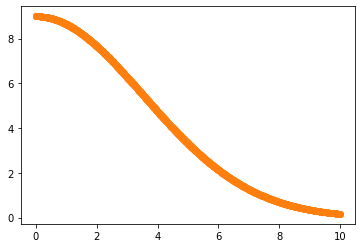

In [3]:
#With splines

func = lambda t: 9*np.exp(-(t / 5)** 2)
func2 = lambda t: 10*np.exp(-(t / 5)** 2)

noise_amp = 0.0
noisy_func = lambda t: func(t)+(noise_amp*func(t))*np.random.randn(t.shape[0])
noisy_func2 = lambda t: func2(t)+(noise_amp*func2(t))*np.random.randn(t.shape[0])

noisy_data = noisy_func(t_arr)
noisy_data2 = noisy_func2(t_arr)

plt.plot(t_arr, func(t_arr))
plt.plot(t_arr, noisy_data, 'o')
plt.show()

In [4]:
#Test Simulation with Cubic Spline:

func_data = func(t_arr)

S = qtp.interpolate.Cubic_Spline(t_arr[0], t_arr[-1], func_data)


sim = simulation(2, 2, 1, 10)
psi0 = sim.ket([0,0],[7])
sim.set_curr_state(psi0)
a  = sim.a(1)
sm = sim.sm(1)
c_ops = []
H0 = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)   
H1 = sim.sx(1)

H = [[H0*sim.sy(2), '1.'], [H1, S] ]#, [H1, '10 * exp(-(t / 5) ** 2)']]
output = sim.evolve_spline(H, t_arr)#, c_ops, [])


No c_ops, using sesolve
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.06s. Est. time left: 00:00:00:00
30.0%. Run time:   0.08s. Est. time left: 00:00:00:00
40.0%. Run time:   0.11s. Est. time left: 00:00:00:00
50.0%. Run time:   0.14s. Est. time left: 00:00:00:00
60.0%. Run time:   0.17s. Est. time left: 00:00:00:00
70.0%. Run time:   0.19s. Est. time left: 00:00:00:00
80.0%. Run time:   0.22s. Est. time left: 00:00:00:00
90.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.28s


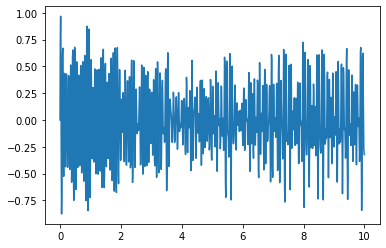

In [5]:
plt.plot(t_arr, qtp.expect(sim.sx(2), sim.states_list) )
plt.show()

In [6]:
sim.apply_gate('ZZ')

In [7]:
sim.gate.get_pauli('ZZ')

Quantum object: dims = [[2, 2, 10], [2, 2, 10]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

In [8]:
sim.curr_state

Quantum object: dims = [[2, 2, 10], [1, 1, 1]], shape = (40, 1), type = ket
Qobj data =
[[ 0.00000000e+00+2.02770267e-08j]
 [ 1.62041700e-07+0.00000000e+00j]
 [ 0.00000000e+00+9.11149828e-05j]
 [ 4.91238045e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.40871946e-02j]
 [-3.56551128e-01+0.00000000e+00j]
 [ 0.00000000e+00-2.55084637e-01j]
 [ 3.74569946e-01+0.00000000e+00j]
 [ 0.00000000e+00-2.48175060e-01j]
 [ 1.17224913e-01+0.00000000e+00j]
 [ 0.00000000e+00-8.93508165e-08j]
 [-1.25756056e-07+0.00000000e+00j]
 [ 0.00000000e+00+1.64209355e-04j]
 [ 4.99656699e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.47856814e-02j]
 [-2.21186351e-01+0.00000000e+00j]
 [ 0.00000000e+00-1.05312196e-01j]
 [ 9.14633584e-02+0.00000000e+00j]
 [ 0.00000000e+00+2.93951692e-01j]
 [ 9.30977150e-02+0.00000000e+00j]
 [-3.94585872e-06+0.00000000e+00j]
 [ 0.00000000e+00-3.82158079e-06j]
 [-4.05214455e-03+0.00000000e+00j]
 [ 0.00000000e+00+6.44616558e-02j]
 [ 2.31420550e-01+0.00000000e+00j]
 [ 0.00000000e+00+8.96107761e-02j]
 [

In [9]:
sim.sx(1)*sim.curr_state

Quantum object: dims = [[2, 2, 10], [1, 1, 1]], shape = (40, 1), type = ket
Qobj data =
[[-3.94585872e-06+0.00000000e+00j]
 [ 0.00000000e+00-3.82158079e-06j]
 [-4.05214455e-03+0.00000000e+00j]
 [ 0.00000000e+00+6.44616558e-02j]
 [ 2.31420550e-01+0.00000000e+00j]
 [ 0.00000000e+00+8.96107761e-02j]
 [ 2.05683432e-01+0.00000000e+00j]
 [ 0.00000000e+00+1.23149369e-01j]
 [-2.54585796e-02+0.00000000e+00j]
 [ 0.00000000e+00-1.62630366e-03j]
 [-4.03048282e-07+0.00000000e+00j]
 [ 0.00000000e+00-2.22034664e-04j]
 [-5.41255526e-03+0.00000000e+00j]
 [ 0.00000000e+00+8.14670850e-02j]
 [ 2.76069138e-01+0.00000000e+00j]
 [ 0.00000000e+00+1.74423018e-01j]
 [ 1.94989005e-01+0.00000000e+00j]
 [ 0.00000000e+00-3.78375936e-01j]
 [-3.92781197e-02+0.00000000e+00j]
 [ 0.00000000e+00-2.10933547e-02j]
 [ 0.00000000e+00+2.02770267e-08j]
 [ 1.62041700e-07+0.00000000e+00j]
 [ 0.00000000e+00+9.11149828e-05j]
 [ 4.91238045e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.40871946e-02j]
 [-3.56551128e-01+0.00000000e+00j]
 [

In [10]:
sim.curr_state

Quantum object: dims = [[2, 2, 10], [1, 1, 1]], shape = (40, 1), type = ket
Qobj data =
[[ 0.00000000e+00+2.02770267e-08j]
 [ 1.62041700e-07+0.00000000e+00j]
 [ 0.00000000e+00+9.11149828e-05j]
 [ 4.91238045e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.40871946e-02j]
 [-3.56551128e-01+0.00000000e+00j]
 [ 0.00000000e+00-2.55084637e-01j]
 [ 3.74569946e-01+0.00000000e+00j]
 [ 0.00000000e+00-2.48175060e-01j]
 [ 1.17224913e-01+0.00000000e+00j]
 [ 0.00000000e+00-8.93508165e-08j]
 [-1.25756056e-07+0.00000000e+00j]
 [ 0.00000000e+00+1.64209355e-04j]
 [ 4.99656699e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.47856814e-02j]
 [-2.21186351e-01+0.00000000e+00j]
 [ 0.00000000e+00-1.05312196e-01j]
 [ 9.14633584e-02+0.00000000e+00j]
 [ 0.00000000e+00+2.93951692e-01j]
 [ 9.30977150e-02+0.00000000e+00j]
 [-3.94585872e-06+0.00000000e+00j]
 [ 0.00000000e+00-3.82158079e-06j]
 [-4.05214455e-03+0.00000000e+00j]
 [ 0.00000000e+00+6.44616558e-02j]
 [ 2.31420550e-01+0.00000000e+00j]
 [ 0.00000000e+00+8.96107761e-02j]
 [

In [11]:
sim.apply_gate("IX")

In [12]:
sim.curr_state

Quantum object: dims = [[2, 2, 10], [1, 1, 1]], shape = (40, 1), type = ket
Qobj data =
[[ 0.00000000e+00-8.93508165e-08j]
 [-1.25756056e-07+0.00000000e+00j]
 [ 0.00000000e+00+1.64209355e-04j]
 [ 4.99656699e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.47856814e-02j]
 [-2.21186351e-01+0.00000000e+00j]
 [ 0.00000000e+00-1.05312196e-01j]
 [ 9.14633584e-02+0.00000000e+00j]
 [ 0.00000000e+00+2.93951692e-01j]
 [ 9.30977150e-02+0.00000000e+00j]
 [ 0.00000000e+00+2.02770267e-08j]
 [ 1.62041700e-07+0.00000000e+00j]
 [ 0.00000000e+00+9.11149828e-05j]
 [ 4.91238045e-03+0.00000000e+00j]
 [ 0.00000000e+00-6.40871946e-02j]
 [-3.56551128e-01+0.00000000e+00j]
 [ 0.00000000e+00-2.55084637e-01j]
 [ 3.74569946e-01+0.00000000e+00j]
 [ 0.00000000e+00-2.48175060e-01j]
 [ 1.17224913e-01+0.00000000e+00j]
 [-4.03048282e-07+0.00000000e+00j]
 [ 0.00000000e+00-2.22034664e-04j]
 [-5.41255526e-03+0.00000000e+00j]
 [ 0.00000000e+00+8.14670850e-02j]
 [ 2.76069138e-01+0.00000000e+00j]
 [ 0.00000000e+00+1.74423018e-01j]
 [